<span style="font-size:250%">Analysis of results of iteration #3</span>

This is the notebook for the results of the third (final) iteration of repository analysis. The documentation for this run can be found in the [RepoAnalysis](./RepoAnalysis.ipynb) notebook. The third iteration used mainly the same technology as the [second run](Results_Iteration#2), but scaled up by a factor off approx. 15 because of incrasing the sample user set and making the bounds for polyglots wider (still preserving a superset of the data of the other runs).

All figures generated in this notebook can be found unter [./results/figures_run_2](./results/figures_run_2).

In [1]:
%load_ext autoreload
%aimport dbUtils

In [2]:
import matplotlib.pyplot as pyplot

## General overview over results

Again, first let's get an overview over the structure of the result data before we get into the evaluation.

How many tuples are there and how do they look like? <br>
There are almost 6 million tuples. Other than that, data looks like in the previous run, which is assuring.

In [15]:
dbUtils.runQuery('''
    SELECT *
    FROM crm20.lb_results3
''', mute=True)

Time used: 36.61904978752136


,sha,parent,timestamp,repo_id,additions,deletions,loc,cloc,file_count,num_methods,num_lambdas,num_comment_lines,num_reflection,num_snakes,total_indent
0,f4f7829732b91bcfed53065121806aac7806d32d,19a27c81a45c193d0558b2b653261c7dddc2c9ff,1344946443,82564,0,0,0,0,0,0,0,0,0,0,0
1,19a27c81a45c193d0558b2b653261c7dddc2c9ff,e09021c1e28eaae86f3560d8aea282b6be7331e6,1344945475,82564,77,0,77,62,1,5,0,3,0,0,110
2,e09021c1e28eaae86f3560d8aea282b6be7331e6,c7cd5f078d907767023445d8473aca990d0bc64f,1343978018,82564,264,0,264,223,1,9,0,3,0,1,553
3,8f0805c34c0448cad7243de4f454035749b0f571,749e5e68b971d5518efda635289cb29bb3a9495e,1340122830,1338752,4,0,4,4,0,1,0,0,0,0,1
4,749e5e68b971d5518efda635289cb29bb3a9495e,4f19b9edbfe4f4ebf4cc8e878fd25d848fad1b43,1338211748,1338752,92,0,92,72,1,1,0,0,0,2,43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5938882,ae6240456182badd1b9589136b01b49dccd89b58,47071c206152a4c85f29650d497d6bc4c2bd8cc8,1239921929,61494,0,0,0,0,0,0,0,0,0,0,0
5938883,47071c206152a4c85f29650d497d6bc4c2bd8cc8,a70f7022071e242b47a0cd25f74baf99e5526d32,1239909927,61494,0,0,0,0,0,0,0,0,0,0,0
5938884,a70f7022071e242b47a0cd25f74baf99e5526d32,9514b265e421b22ab0d59b6009ecb99b62150cd8,1239907566,61494,0,0,0,0,0,0,0,0,0,0,0
5938885,9514b265e421b22ab0d59b6009ecb99b62150cd8,bff301df731f8f9c309c9cf63fa11e65ab10b256,1239897757,61494,4422,0,4422,2703,41,150,0,281,14,96,5180


## Prepare for analysis

### Add author information and filter for experiment authors

Again, author information is joined in to attribute the commit changes to developers. Again, only the experiment users are taken, further evaluation on the base data could look at the toatl java developers again. Note the `DISTINCT` which, together with the removal of the `repoId` column, eliminates duplicates originating from forks.

In [ ]:
dbUtils.runQuery('''
    DROP MATERIALIZED VIEW IF EXISTS crm20.lb_experimentset3;
    
    CREATE MATERIALIZED VIEW crm20.lb_experimentset3 AS (
        SELECT DISTINCT lb_results3.sha, lb_results3.timestamp, author_id, additions, deletions, additions + deletions AS changes, loc, cloc, file_count, num_methods, num_lambdas, num_comment_lines, num_reflection, num_snakes, total_indent
        FROM crm20.lb_results3, ght.commits
        WHERE lb_results3.sha = commits.sha
        AND author_id IN (SELECT author_id FROM crm20.lb_experimentusers)
    );
    
    SELECT * FROM crm20.lb_experimentset3
''')

Because of the long run time of the query, here are the results: <br>
There are 320k tuples that could all be attributed to experiment authors - this is almost twelve times the 27k of the second run, and twenty times the 16k of the first run!

In [5]:
dbUtils.runQuery('''
    SELECT * FROM crm20.lb_experimentset3
''')

Time used: 1.8233139514923096


,sha,timestamp,author_id,additions,deletions,changes,loc,cloc,file_count,num_methods,num_lambdas,num_comment_lines,num_reflection,num_snakes,total_indent
0,000087d0ec3a5150cd62626532a55d2f9b01ac44,1433252442,2192544,281,0,281,281,203,2,12,0,0,1,16,316
1,0000d51598e1691c28fbdaffd189be207545092b,1387046118,2558680,36,13,49,23,20,0,2,0,1,0,2,34
2,0000ed3326f510427c6de2aa5bc63170d7bb6915,1517347719,11657771,310,155,465,155,70,3,3,2,18,0,-2,51
3,00010cda4bc2e8ecf2fb63f1f085fc4a75f1ad46,1478157211,27479847,135,90,225,45,43,1,4,0,0,0,0,81
4,00011c69673a28cdca68e586f6696bec815fac0e,1488388630,32841082,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320505,fffe6ca1e02e9079989e2c0921cc2ea35dd0a542,1456359136,8263469,0,0,0,0,0,0,0,0,0,0,0,0
320506,fffeb8b9a6bdf8561c39cb87d3e42f2cdc3a620b,1377691288,119896,0,0,0,0,0,0,0,0,0,0,0,0
320507,ffff355803efb7068ebda8b81f6107a07d497a07,1460749354,65202,0,0,0,0,0,0,0,0,0,0,0,0
320508,ffff73a40fd25ac66935eb22cdfa01259cdbcbe8,1384843705,2507584,1,0,1,1,1,0,0,0,0,0,0,3


### Create averages for authors

To reflect over the overall code quality of each author and to compare authors of the two groups, averages for each author are calculated. This removes the over-time aspect from the commit data, but allows to see general differences. 

It is good to see that there is data for at least 2.2k experiment users (while this is a significant reduction compared to the 3.2k users in the experiment_user view)

In [6]:
dbUtils.runQuery('''
    DROP VIEW IF EXISTS crm20.lb_authoravgs3;
    CREATE VIEW crm20.lb_authoravgs3 AS (
        SELECT
            author_id,
            AVG(CAST(loc AS DECIMAL)) AS loc,
            AVG(CAST(cloc AS DECIMAL)) AS cloc,
            AVG(CAST(file_count AS DECIMAL)) AS filecount,
            AVG(CAST(num_methods AS DECIMAL)/changes) AS methods,
            AVG(CAST(num_lambdas AS DECIMAL)/changes) AS lambdas,
            AVG(CAST(num_comment_lines AS DECIMAL)/changes) AS commentlines,
            AVG(CAST(num_reflection AS DECIMAL)/changes) AS reflection,
            AVG(CAST(num_snakes AS DECIMAL)/changes) AS snakes,
            AVG(CAST(total_indent AS DECIMAL)/changes) AS indent
        FROM crm20.lb_experimentset3
        WHERE changes > 0
        AND changes < 1000
        GROUP BY author_id
    );
    SELECT * FROM crm20.lb_authoravgs3
''', mute=True)

Time used: 0.38916778564453125


,author_id,loc,cloc,filecount,methods,lambdas,commentlines,reflection,snakes,indent
0,3140499,52.423077,40.750000,0.538462,0.013282,-0.000174,0.048184,0.000474,0.012482,0.961172
1,9303743,50.750000,43.500000,0.500000,-0.005365,0.000000,0.083076,0.000278,0.000000,0.176323
2,1045364,129.559524,108.928571,1.000000,0.033036,0.000000,0.065060,0.009205,0.051444,1.151549
3,1493862,30.062500,28.406250,0.093750,0.019171,0.000000,0.072510,-0.000263,0.074739,1.014093
4,8423819,-29.866667,-26.333333,-0.133333,0.000184,0.000000,-0.007701,0.000000,-0.039946,0.274522
...,...,...,...,...,...,...,...,...,...,...
2194,3872631,12.200000,10.773333,0.106667,0.008981,0.000060,0.010590,0.000035,0.035791,0.939945
2195,13132203,341.500000,280.500000,2.000000,0.026832,0.000000,0.134004,-0.013188,0.258290,1.195740
2196,1396683,155.000000,141.000000,1.000000,0.045161,0.000000,0.154839,0.025806,0.083871,2.064516
2197,50008691,232.466667,209.266667,2.066667,0.035280,0.000886,0.119179,0.000351,0.140008,1.385461


### Select grouped data

To compare the experiment groups, the data per developer is split. This evaluation run, polyglot data is also further split into Javascript and Python developers.

In [7]:
aggregatedDataPolyglot = dbUtils.runQuery('''
    SELECT *
    FROM crm20.lb_authoravgs3
    WHERE author_id IN (SELECT author_id FROM crm20.lb_polyglots)
''', mute=True)
display(aggregatedDataPolyglot)

Time used: 0.26337552070617676


,author_id,loc,cloc,filecount,methods,lambdas,commentlines,reflection,snakes,indent
0,3140499,52.423077,40.750000,0.538462,0.013282,-0.000174,0.048184,0.000474,0.012482,0.961172
1,1045364,129.559524,108.928571,1.000000,0.033036,0.000000,0.065060,0.009205,0.051444,1.151549
2,1493862,30.062500,28.406250,0.093750,0.019171,0.000000,0.072510,-0.000263,0.074739,1.014093
3,13688256,19.551724,17.229885,0.287356,0.013349,0.000141,0.095270,0.000031,0.022278,0.427996
4,14067,41.097561,34.902439,0.573171,0.023667,0.004911,0.034853,0.007808,0.022246,0.850900
...,...,...,...,...,...,...,...,...,...,...
1180,11368793,38.972973,30.972973,0.351351,0.014005,0.000000,-0.006776,0.000662,0.016181,0.522804
1181,48349775,45.978261,35.913043,0.695652,0.021846,0.000000,0.041449,0.000000,0.000000,0.518563
1182,6495581,101.411765,85.588235,1.588235,0.033333,0.000000,0.026346,0.001138,0.066910,0.746878
1183,44599187,85.208333,79.125000,0.791667,0.047061,0.000000,0.023352,0.000000,0.127637,1.078414


In [9]:
aggregatedDataPython = dbUtils.runQuery('''
    SELECT *
    FROM crm20.lb_authoravgs3
    WHERE author_id IN (
        SELECT author_id 
        FROM crm20.lb_polyglots 
        WHERE 'py' = ANY(secondary_languages)
    )
''', mute=True)
display(aggregatedDataPython)

Time used: 0.24738025665283203


,author_id,loc,cloc,filecount,methods,lambdas,commentlines,reflection,snakes,indent
0,3140499,52.423077,40.750000,0.538462,0.013282,-0.000174,0.048184,0.000474,0.012482,0.961172
1,13688256,19.551724,17.229885,0.287356,0.013349,0.000141,0.095270,0.000031,0.022278,0.427996
2,14067,41.097561,34.902439,0.573171,0.023667,0.004911,0.034853,0.007808,0.022246,0.850900
3,5070315,70.645161,62.322581,0.548387,0.014744,0.000000,0.032621,0.000000,0.138631,0.753653
4,1123028,22.166667,19.406250,0.072917,0.008243,0.000717,0.030418,0.000414,-0.009034,0.402809
...,...,...,...,...,...,...,...,...,...,...
245,10337329,231.250000,215.250000,2.250000,0.022712,0.000000,0.012660,0.000283,0.024943,0.418050
246,990448,61.500000,63.000000,0.000000,0.000000,0.004706,0.195294,0.000000,0.000000,0.218522
247,1965412,207.800000,184.600000,3.000000,0.071084,0.000000,0.036612,0.000443,0.002091,0.735421
248,8106144,63.788732,56.359155,0.316901,0.021388,-0.000271,0.018958,0.000272,0.076431,0.409954


In [10]:
aggregatedDataJavascript = dbUtils.runQuery('''
    SELECT *
    FROM crm20.lb_authoravgs3
    WHERE author_id IN (
        SELECT author_id 
        FROM crm20.lb_polyglots 
        WHERE 'js' = ANY(secondary_languages)
    )
''', mute=True)
display(aggregatedDataJavascript)

Time used: 0.26136183738708496


,author_id,loc,cloc,filecount,methods,lambdas,commentlines,reflection,snakes,indent
0,1045364,129.559524,108.928571,1.000000,0.033036,0.000000,0.065060,0.009205,0.051444,1.151549
1,1493862,30.062500,28.406250,0.093750,0.019171,0.000000,0.072510,-0.000263,0.074739,1.014093
2,13688256,19.551724,17.229885,0.287356,0.013349,0.000141,0.095270,0.000031,0.022278,0.427996
3,200835,43.501466,38.815249,0.263930,0.018293,0.000000,0.042295,0.000356,0.000702,0.720513
4,31011289,13.000000,2.333333,0.333333,-0.009567,0.000000,0.000000,0.000000,0.000000,0.220321
...,...,...,...,...,...,...,...,...,...,...
993,11368793,38.972973,30.972973,0.351351,0.014005,0.000000,-0.006776,0.000662,0.016181,0.522804
994,48349775,45.978261,35.913043,0.695652,0.021846,0.000000,0.041449,0.000000,0.000000,0.518563
995,6495581,101.411765,85.588235,1.588235,0.033333,0.000000,0.026346,0.001138,0.066910,0.746878
996,44599187,85.208333,79.125000,0.791667,0.047061,0.000000,0.023352,0.000000,0.127637,1.078414


In [12]:
aggregatedDataControlGroup = dbUtils.runQuery('''
    SELECT *
    FROM crm20.lb_authoravgs3
    WHERE author_id IN (SELECT author_id FROM crm20.lb_controlgroup)
''', mute=True)
display(aggregatedDataControlGroup)

Time used: 0.2614467144012451


,author_id,loc,cloc,filecount,methods,lambdas,commentlines,reflection,snakes,indent
0,9303743,50.750000,43.500000,0.500000,-0.005365,0.000000,0.083076,0.000278,0.000000,0.176323
1,8423819,-29.866667,-26.333333,-0.133333,0.000184,0.000000,-0.007701,0.000000,-0.039946,0.274522
2,346923,49.076087,40.032609,0.369565,0.015106,0.000000,0.009854,0.003098,0.070381,1.197750
3,10629931,61.583333,50.041667,0.416667,0.016316,0.000000,-0.212865,0.005208,0.115397,0.287156
4,11826695,61.166667,48.138889,1.000000,0.069324,0.001627,-0.002079,0.000000,0.001496,0.802232
...,...,...,...,...,...,...,...,...,...,...
1009,1347191,73.897436,61.282051,0.871795,0.021135,0.007953,0.069218,0.001757,0.008853,0.730582
1010,3872631,12.200000,10.773333,0.106667,0.008981,0.000060,0.010590,0.000035,0.035791,0.939945
1011,1396683,155.000000,141.000000,1.000000,0.045161,0.000000,0.154839,0.025806,0.083871,2.064516
1012,50008691,232.466667,209.266667,2.066667,0.035280,0.000886,0.119179,0.000351,0.140008,1.385461


# Visualization

For a manual evaluation of the data (and some sanity checking), boxplots are chosen to visualize the data.

The great increase in outliers and the extremeness of them makes a manual evaluation hard. Therefore, the run is started again without outliers.

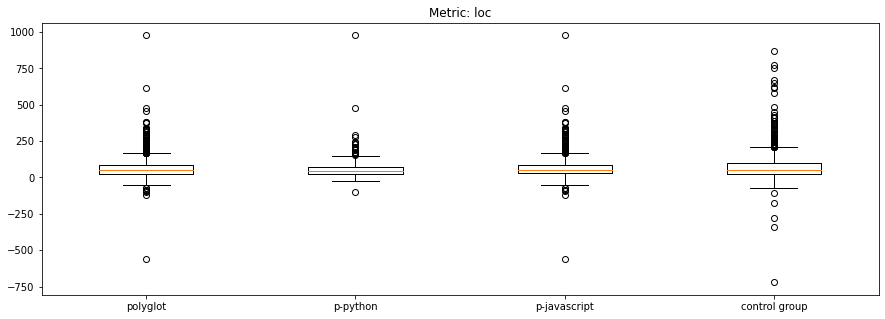

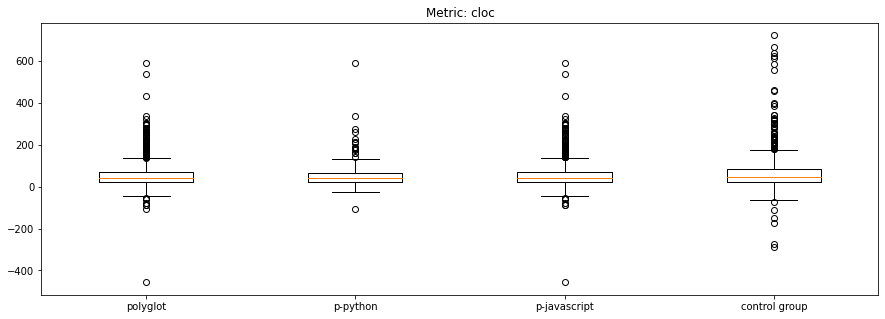

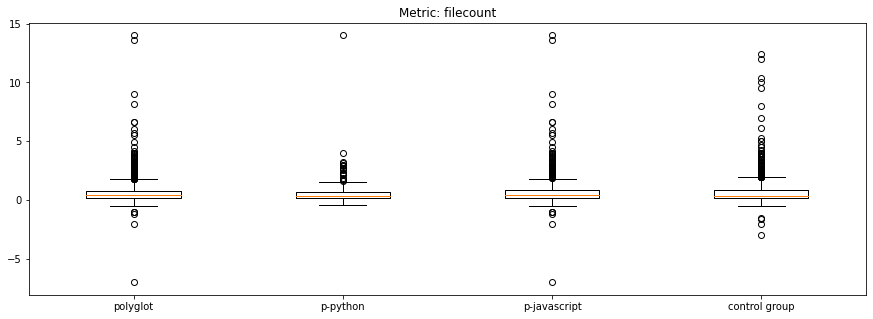

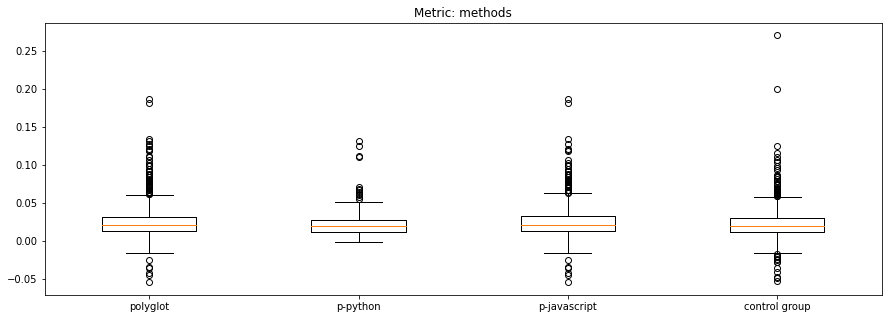

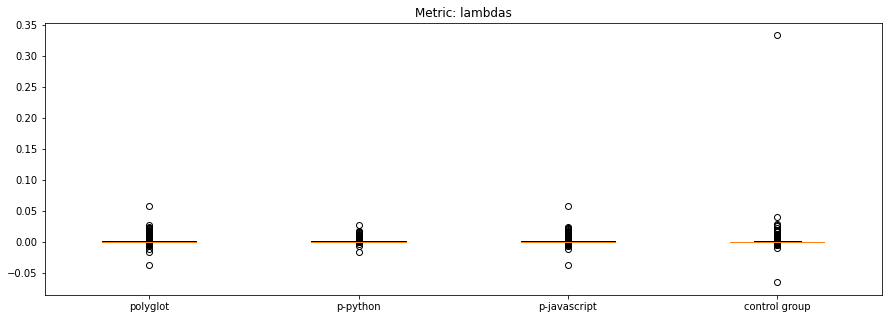

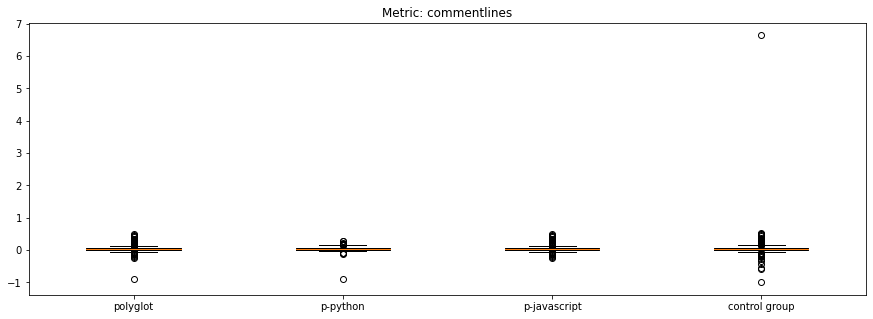

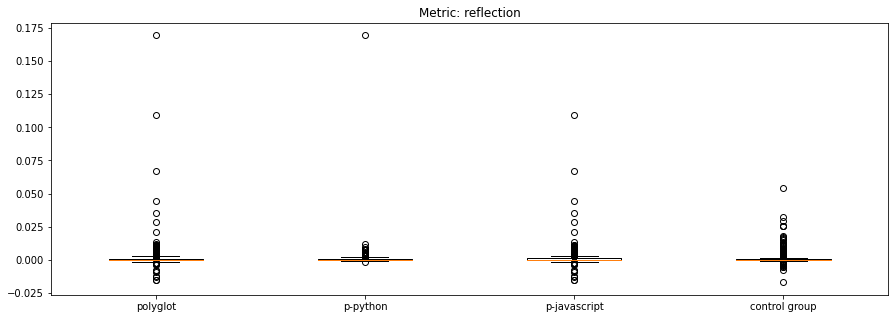

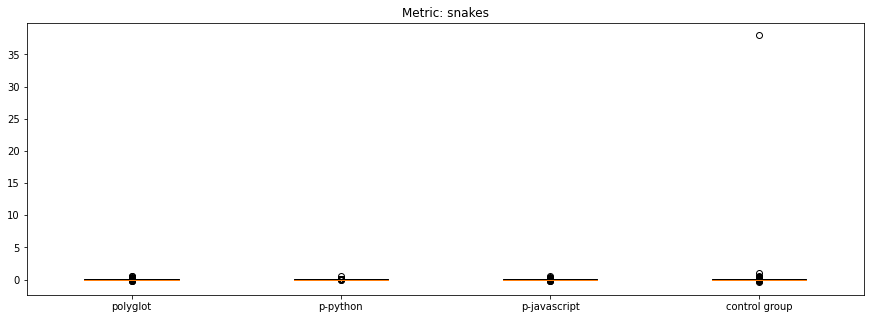

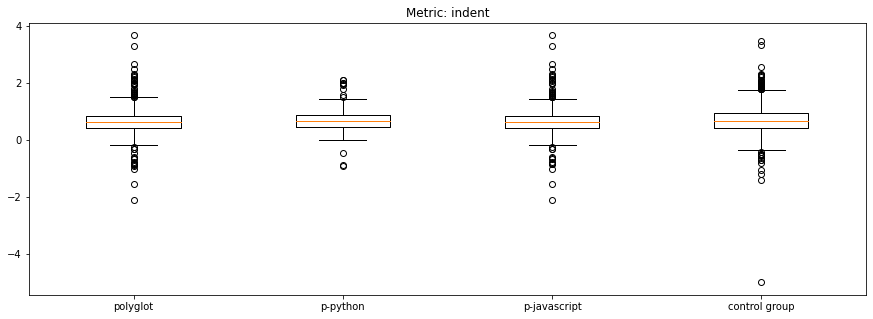

In [16]:
for metric in aggregatedDataPolyglot:
    if metric == 'author_id': continue 
        
    pyplot.figure(figsize=(15, 5))
    pyplot.title('Metric: '+metric)
    pyplot.boxplot(
        [aggregatedDataPolyglot[metric], aggregatedDataPython[metric], aggregatedDataJavascript[metric], aggregatedDataControlGroup[metric]], 
        labels=['polyglot', 'p-python', 'p-javascript', 'control group']
    )
    pyplot.savefig('figures/set_3/boxplot_'+metric+'.png')

Plotted without outliers, the data shows that there are slight differences between Python and Javascript polyglot, for example for the snake case density. Other than that, the data looks like in previous runs, it feels like the difference between polyglot and control group has decreased, but statistical tests will analyze this. 

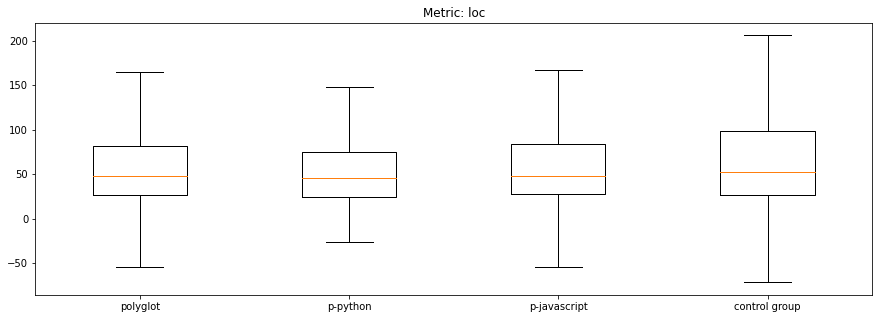

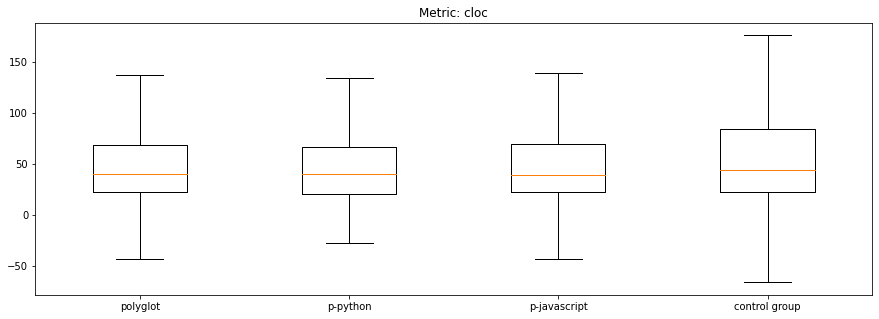

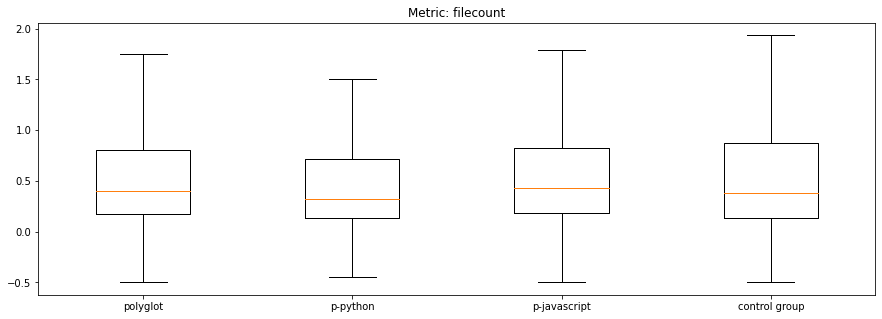

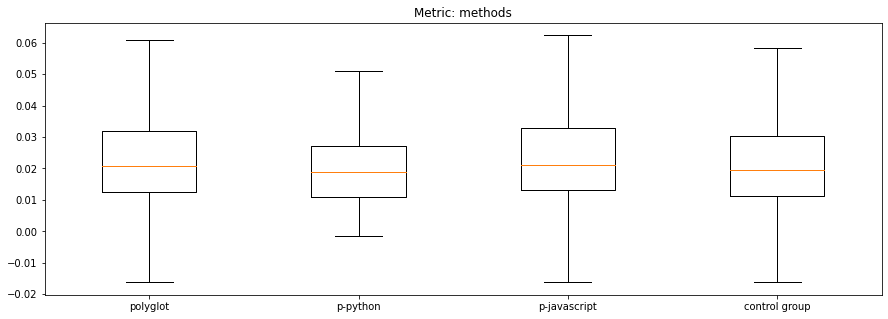

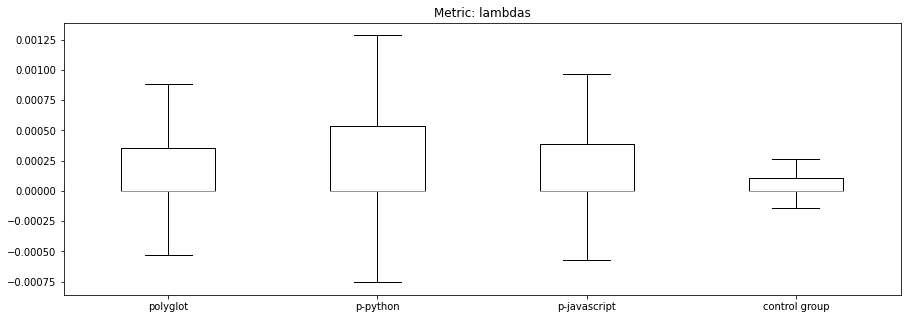

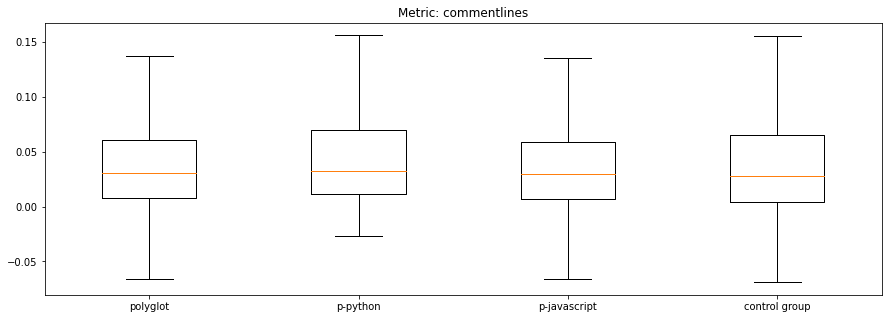

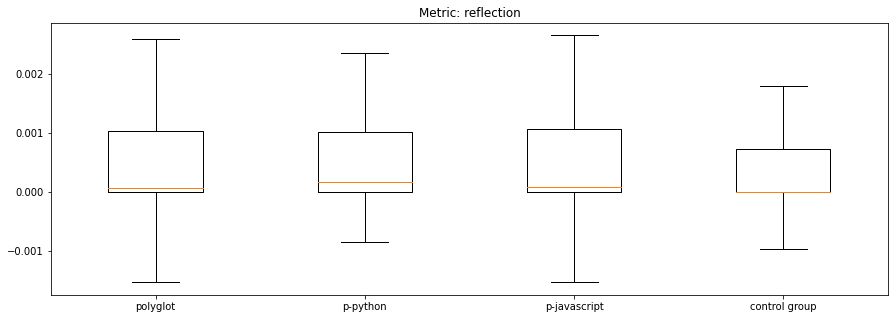

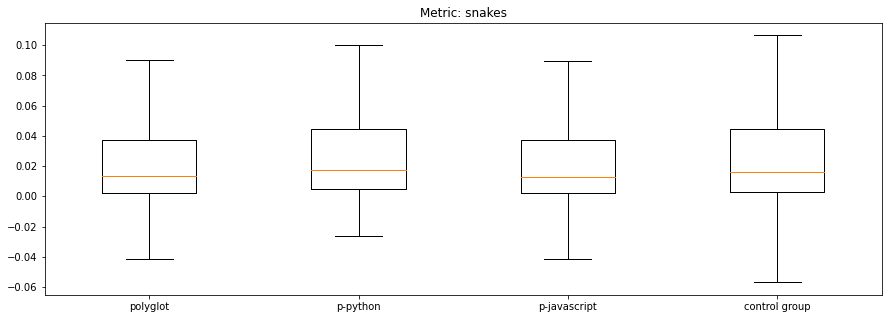

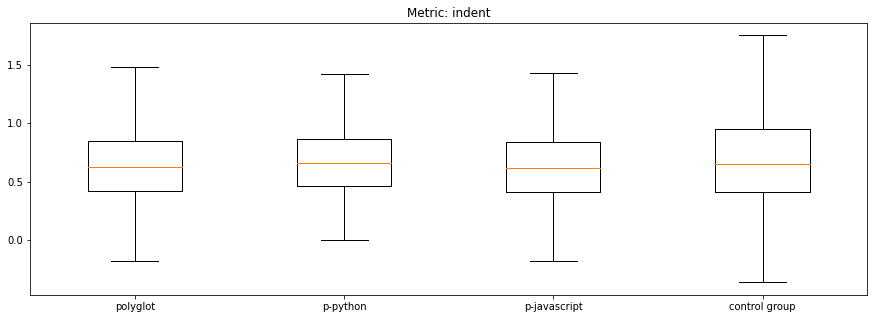

In [17]:
for metric in aggregatedDataPolyglot:
    if metric == 'author_id': continue 
        
    pyplot.figure(figsize=(15, 5))
    pyplot.title('Metric: '+metric)
    pyplot.boxplot(
        [aggregatedDataPolyglot[metric], aggregatedDataPython[metric], aggregatedDataJavascript[metric], aggregatedDataControlGroup[metric]], 
        labels=['polyglot', 'p-python', 'p-javascript', 'control group'],
        showfliers=False
    )
    pyplot.savefig('figures/set_3/boxplot_'+metric+'_no_outliers.png')

# Statistical testing

This time, more comparisons are run: Not only between all polyglots and control group, but also between Javascript subset and control group, Python subset and control group, and between the two polyglot subsets.

In [19]:
from scipy.stats import mannwhitneyu

def compareSets(set1, set2):
    for metric in aggregatedDataPolyglot:
        if metric == 'author_id': continue 
        pvalue = mannwhitneyu(set1[metric], set2[metric]).pvalue
        print((metric+': ').ljust(15)+str(pvalue)+'\t '+str(pvalue < 0.05))
    print('')

print('=== Polyglot vs. Control group ===')
compareSets(aggregatedDataPolyglot, aggregatedDataControlGroup)

print('=== Javascript Polyglot vs. Control group ===')
compareSets(aggregatedDataJavascript, aggregatedDataControlGroup)

print('=== Python Polyglot vs. Control group ===')
compareSets(aggregatedDataPython, aggregatedDataControlGroup)

print('=== Javascript Polyglot vs. Python Polyglot ===')
compareSets(aggregatedDataJavascript, aggregatedDataPython)

=== Polyglot vs. Control group ===
loc:           0.01291994193519089	 True
cloc:          0.004494383489749395	 True
filecount:     0.07521447879544092	 False
methods:       0.010885757437935788	 True
lambdas:       0.002622392472720286	 True
commentlines:  0.12840192128666877	 False
reflection:    0.0018303607877819504	 True
snakes:        0.03016012373207393	 True
indent:        0.06425268099204481	 False

=== Javascript Polyglot vs. Control group ===
loc:           0.02509712659741837	 True
cloc:          0.006716531504753785	 True
filecount:     0.021473448284502563	 True
methods:       0.0018934243776209058	 True
lambdas:       0.00263463774027284	 True
commentlines:  0.29277813642464096	 False
reflection:    0.003373880291831272	 True
snakes:        0.00991436163347407	 True
indent:        0.021260835790665306	 True

=== Python Polyglot vs. Control group ===
loc:           0.01535257109685761	 True
cloc:          0.023324058227238553	 True
filecount:     0.11542345109443242	 Fal

This leads to very interesting results: 
* Generally, some significances have swapped compared to the previous runs, namely: method length, lambda usage, and reflection usage from false to true and comment density and average indent from true to false. This is devastating as it implies that the effects measured before are probably not representative
* Both, Javascript and Python, subgroups show a great number of differences to the control group, but do not show the same differences (which can be the reason why so many effects flipped). Comparing the two groups shows that they are indeed different


* The changed lines of code per commit are significant for all polyglot groups and are not significant between the two subgroups - this could indicate an actual effect as this result is consistent with previous tests
* The changed number of files however differs between the polyglot subgroups, showing significance only for the Javascript group. This could indicate a difference in precision or size of commits. It is notable that the js group does not dominate the joined polyglot group for this metric
* Method density shows significance for the polyglot group and the Javascript group, but not for the Python group. Looking at the boxplots, js devs seem to have a higher density compared the other devs. As they dominate the polyglot set, so does the polyglot set.
* Lambda usage is significant for all polyglot groups and not significant between the groups. The boxplot however indicate that Python developers might use them more consistently. It is notable, however, how this metric flipped from 40% in the last run to 0.03%. This actually indicates a high non-representativeness of the smaller dataset 
* Comment density showed significance in the last run, but does only for Python devs this run. This is weird, because the python developers could not have dominated the metric in the last run unless the effect size is quite large
* Reflection usage, like lambda usage, is a quite safe metric that shows high significance for all polyglot groups, especially the python group
* Snake case usage surprisingly shows no significance for the python group, but only for the javascript group. The boxplot indicates that the js devs use less, but the python devs do not use more snakes. This might be caused by java only developers also using snakes despite not writing python.
* Indentation again surprisingly does not show significance for the python group, but only for the javascript group. The js groups does not dominate all polyglots here 

To sum up the results are rather surprising and in many cases contradict the previously observed effects. Metrics that are consistently significant across both polyglot subgroups are (class) lines of code per commit, lambda usage, and reflection usage, with the latter two however having flipped compared to the last run. The Javascript group generally shows bigger differences than the Python group, adding changed file count, method density, snake case usage, and average indent to the list, with only the comment line metric being found in the Python but not the js group.  

Many of the significance changes compared to the previous run could be explained with the larger quantity of python developers in the experiment set (which show to have different code properties than the js developers), which decreases the domination of the js developers. Comment density is a big exception, as it only shows significance for the python developers, yet showed significance in the previous smaller data set. 

Concluding, while there are some metrics where there is a correlation with high probability, some are still unclear. The input set might be to small to derive representative results or there is no correlation. Future work might have another look into this.